In [1]:
from itertools import combinations

import pandas as pd
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import scipy.stats as stats

import csv
import numpy as np
from scipy.stats import shapiro, normaltest
import glob

import os
from sklearn import tree
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D  # For custom legend
import pydotplus
import seaborn as sns

from sklearn import tree

from sklearn.datasets import load_iris

import pydotplus

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

import numpy as np

from tqdm import tqdm

varidDurationPrefix = 'varied-'
constnatdurationPrefix = 'constant200-'

Utility function

In [2]:
def flatten_list_of_lists(lst_of_lsts):
    return [item for sublist in lst_of_lsts for item in sublist]


def get_featureList_index() -> list[str]:
        file_paths = 'feature_name_list_compare.txt'
        filename = file_paths

        content_list = []

        with open(filename, 'r') as file:
            content_list = [line.strip() for line in file]

        feature_name_list = content_list

        return feature_name_list


In [3]:

constantCSVPath = '/Users/mingshi/Desktop/PythonProject/Range_alignment/final-merge-all-200ms-firstpass.csv'

data = pd.read_csv(constantCSVPath)


# Tranform any laughter categories,such as "[laugh]-null Discouse " into Ambiguous

# Data preporcessing

In [4]:
# Transforming any concise merge type containing "null" into Ambiguous
data.loc[data['concise merge type'].str.contains('null'), 'concise merge type'] = 'Ambiguous'

In [5]:
discoueseV= '[laugh]-Discourse [V]'
discourseS =  '[laugh]-Discourse S'
discoureLaugh = '[laugh]-Discourse'
data['concise merge type'] = data['concise merge type'].replace(discoueseV, discoureLaugh)
data['concise merge type'] = data['concise merge type'].replace(discourseS, discoureLaugh)

In [6]:
responseListresponseList = set(data['concise merge type'].tolist())
responseListresponseList


{'Ambiguous',
 'M',
 'S',
 'Silience',
 '[V]',
 '[laugh]-Discourse',
 '[laugh]-Mirthful'}

# Label distribution

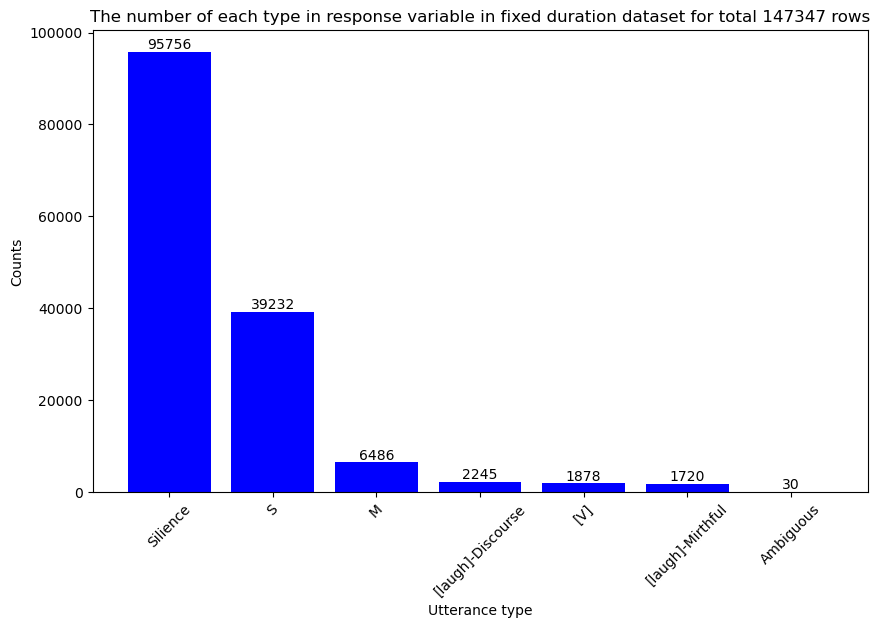

In [7]:
import matplotlib.pyplot as plt
from collections import Counter
conside_column_name = 'concise merge type'
y_indepdent = data[conside_column_name]
y_indepdent_list = y_indepdent.tolist()
# Example list with values
values = y_indepdent_list
lenthvariable = len(values)
# Count each unique value using Counter and sort them in descending order
value_counts = Counter(values).most_common()

# Separate the keys (unique values) and their counts
labels, counts = zip(*value_counts)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, counts, color='blue')

# Adding value labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, yval, ha='center', va='bottom')

plt.xlabel('Utterance type')
plt.ylabel('Counts')
titleName ='The number of each type in response variable in fixed duration dataset for total ' +str(lenthvariable)+" rows" 
plt.title(titleName)
plt.xticks(rotation=45)  # Rotate labels to avoid overlap
saveName =constnatdurationPrefix+'labeled dsitribution.png'
plt.savefig(saveName)
plt.show()


# Spliting the data

In [7]:
conside_column_name = 'concise merge type'
y_indepdent = data[conside_column_name]
y_indepdent_list = y_indepdent.tolist()
y_indepdent_CV_LIST_unique = list(set(y_indepdent_list))

featurelist = get_featureList_index()

X_feature = data[featurelist]

X_acuostic_feature_numpy_array = X_feature.values

In [8]:
    # '[laugh]-Discourse [V]'
    #     '[laugh]-Discourse'
    #      '[laugh]-Mirthful'
    #       '[laugh]-Discourse S'
    # '[laugh]-Discourse [V]'
    #     '[laugh]-Discourse'
    #      '[laugh]-Mirthful'
    #       '[laugh]-Discourse S'
    


X_feature_temp = X_feature
X_feature_temp.fillna(0, inplace=True)
X_acuostic_feature_numpy_array = X_feature_temp.values

y_indepdent_list = y_indepdent.tolist()


/var/folders/j4/s37rcpps3kj5ktfxvqhqq3_m0000gn/T/ipykernel_5610/2190264374.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_feature_temp.fillna(0, inplace=True)


In [9]:
targetList = list(responseListresponseList)
utterance_type_mapping_dict = {utterance_type: idx for idx, utterance_type in enumerate(responseListresponseList)}
y_map = [utterance_type_mapping_dict[category] for category in y_indepdent_list]


In [10]:
utterance_type_mapping_dict

{'[V]': 0,
 'Silience': 1,
 'Ambiguous': 2,
 'S': 3,
 '[laugh]-Mirthful': 4,
 'M': 5,
 '[laugh]-Discourse': 6}

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_acuostic_feature_numpy_array)
x_train,x_test,y_train,y_test = train_test_split(X_scaled, y_indepdent_list,
                                                        test_size=0.3, random_state=42)



In [12]:
targetList = list(responseListresponseList)
targetList

['[V]',
 'Silience',
 'Ambiguous',
 'S',
 '[laugh]-Mirthful',
 'M',
 '[laugh]-Discourse']

# Decision tree visualization

In [13]:
from sklearn.metrics import accuracy_score


clf = tree.DecisionTreeClassifier(criterion='gini',max_depth=2,min_samples_split=10,random_state=42,class_weight='balanced')
clf.fit(x_train,y_train)
y_test_pred = clf.predict(x_test)
from sklearn import tree

import pydotplus
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=featurelist,
                                class_names=targetList,
                                filled=True, rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
saveNameD = 'MutinomialModel-'+constnatdurationPrefix+'-decsion.pdf'
graph.write_pdf(saveNameD)

True

# Multinoniral regression 

In [15]:
# https://www.geeksforgeeks.org/python-reversing-list/
# Reversing a list using slicing technique
def Reverse(lst):
   new_lst = lst[::-1]
   return new_lst

In [16]:
# Imbalanced data
# parameter setting adopt this work's parameter https://publications.scss.tcd.ie/theses/diss/2022/TCD-SCSS-DISSERTATION-2022-095.pdf
model = LogisticRegression (multi_class='multinomial', penalty='l2', solver='lbfgs',max_iter=1000,class_weight='balanced')
model.fit(x_train, y_train)

model.fit(x_train,y_train)
y_test_pred = model.predict(x_test)
mnr_accuracy = accuracy_score(y_test, y_test_pred)
print("Predication result is" +str(mnr_accuracy))
print('------------------')
# MUTINONIAL REGRESSION MORE THAN 500 discrinminating fearures
coefficients = pd.DataFrame(model.coef_, index=targetList, columns=featurelist)
#change to other luaghte type






/Users/mingshi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/mingshi/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

Predication result is0.38762583418165364
------------------


# Select the specific laughter type of discinimating feature

In [17]:
# select model utterance
discoueseV= '[laugh]-Discourse [V]'
discourseS =  '[laugh]-Discourse S'
discoureLaugh = '[laugh]-Discourse'
mirthfulLaugh = '[laugh]-Mirthful'

#utter_type = discoureLaugh
list_of_laughter = ['[laugh]-Discourse', '[laugh]-Mirthful']

In [18]:
list_of_laughter

['[laugh]-Discourse', '[laugh]-Mirthful']

# Automatically run

In [19]:
for utter_type in list_of_laughter:
  sizeOfGreathernCoeceint = len(coefficients.loc[utter_type][coefficients.loc[utter_type] > 0])
  print("the sixe of value is "+str(sizeOfGreathernCoeceint))
  sorted_coefficients = coefficients.loc[utter_type][coefficients.loc[utter_type] > 0].sort_values(ascending=True)
  discrinminatingFeatureSeries =  coefficients.loc[utter_type][coefficients.loc[utter_type] > 0].sort_values(ascending=True)
  import numpy as np
  import pandas as pd

  import scipy.stats as stats

  disending_oreder_discrinminating_featureList = Reverse(sorted_coefficients.index.tolist())
  feature_names = disending_oreder_discrinminating_featureList
  results = []

  for i in range(len(feature_names) - 1):
      feature_1 = feature_names[i]
      feature_2 = feature_names[i + 1]
      
      feature1Name = feature_1
    #  epsilon = 1e-6
    #  f_1list_modified = f_1list + epsilon
      f_1list = X_feature_temp[feature1Name].tolist()
      
      feature2Name = feature_2
      f_2list = X_feature_temp[feature2Name].tolist()
      differences = np.array(f_1list) - np.array(f_2list)
      if np.all(differences == 0):
        print("All differences are zero. Consider alternative analyses.")
        resultfromWilT = 0
        results.append({
          'Adjancey feature 1': feature_1,
          'Adjancey feature 2': feature_2,
          'P-Value': 0
          })
      else:
        resultfromWilT = stats.wilcoxon(f_1list, f_2list, zero_method='pratt')  # or 'wilcox'
        #print(resultfromWilT)
        stast, p_value  =resultfromWilT
        results.append({
          'Adjancey feature 1': feature_1,
          'Adjancey feature 2': feature_2,
          'P-Value': p_value
          })

  # Convert results to a DataFrame
  results_df = pd.DataFrame(results)
  #topNSaveName = 'mutlinomial'+'-adjaancyFeatureSignificantlist-Wilconx-Sign-Rank-test.csv'
  #results_df.to_csv(topNSaveName, index=True)
  # filter the feature correlation is great than 0.05 
  not_correlated_df = results_df[results_df['P-Value'] >= 0.05].copy()
  feature1Name = not_correlated_df['Adjancey feature 1'].tolist()
  feature2Name =not_correlated_df['Adjancey feature 2'].tolist()
  mergeList = feature2Name+feature1Name
  totalNameSet = list(set(mergeList))
  selected_rows_series = sorted_coefficients.loc[totalNameSet]
  # Convert the Series into a DataFrame
  selected_row_df = selected_rows_series.to_frame(name='Values')
  # Reset the index name
  selected_row_df = selected_row_df.reset_index().rename(columns={'index': 'Feature name'})
  selected_row_df = selected_row_df.sort_values(by='Values', ascending=False)
  selected_row_df = selected_row_df.reset_index(drop=True)
  topNSaveName = constnatdurationPrefix+utter_type+'-DiscrinimatingFeatureListCoeffient-MultinomalTreeModel.csv'


  selected_row_df.to_csv(topNSaveName, index=True)
  final_discrinimianting_featureName = selected_row_df['Feature name'].tolist()
  final_featureDF = data[final_discrinimianting_featureName]
  print(len(final_featureDF))

  statisticTable_final_featureDF = final_featureDF.describe().T
  columns_to_drop = statisticTable_final_featureDF.columns[[0,4, 6]] 
  describe_final_info = statisticTable_final_featureDF.drop(columns=columns_to_drop)
  describe_final_info = describe_final_info.applymap(lambda x: f'{x:.3f}' if isinstance(x, (int, float)) else x)
  topNSaveName = constnatdurationPrefix+utter_type+'-topN-Stastical-inforamtion-MultinomalTreeModel.csv'

  describe_final_info.to_csv(topNSaveName, index=True)
    
    

the sixe of value is 3153
All differences are zero. Consider alternative analyses.
All differences are zero. Consider alternative analyses.
All differences are zero. Consider alternative analyses.
147347
the sixe of value is 3234
All differences are zero. Consider alternative analyses.
147347


# Select the narrow feature

# Wilcox ranked test to determine the corrlation between adjancy feature in the ranked list

# Delete the edge has corrlection in the adjancey list 

# Statistic table

# Box plot to visalusazation

# Confusion matrix

In [20]:
from sklearn.metrics import classification_report, confusion_matrix
myreport  = classification_report(y_test, y_test_pred)
print(classification_report(y_test, y_test_pred))

/Users/mingshi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mingshi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mingshi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mingshi/anacond

                   precision    recall  f1-score   support

        Ambiguous       0.00      0.00      0.00        12
                M       0.07      0.25      0.11      1927
                S       0.36      0.29      0.32     11720
         Silience       0.76      0.46      0.57     28732
              [V]       0.02      0.09      0.03       585
[laugh]-Discourse       0.02      0.11      0.03       692
 [laugh]-Mirthful       0.01      0.07      0.02       537

         accuracy                           0.39     44205
        macro avg       0.18      0.18      0.15     44205
     weighted avg       0.59      0.39      0.46     44205



/Users/mingshi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mingshi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_test_pred)

0.09818011747506794

In [22]:
labels

('Silience',
 'S',
 'M',
 '[laugh]-Discourse',
 '[V]',
 '[laugh]-Mirthful',
 'Ambiguous')

In [25]:
from sklearn.metrics import confusion_matrix
import numpy as np

# Extract unique labels and sort them alphabetically
labels = np.unique(np.concatenate((y_test, y_test_pred))) 
sorted_labels = sorted(labels)

# Compute confusion matrix with sorted labels
cm = confusion_matrix(y_test, y_test_pred, labels=sorted_labels)

# Display the confusion matrix
print(f"Confusion Matrix:\n{cm}")

# If you want to display with labels for better readability
import pandas as pd

cm_df = pd.DataFrame(cm, index=sorted_labels, columns=sorted_labels)
print(f"\nConfusion Matrix with Labels:\n{cm_df}")
plt.figure(figsize=(10, 7))

# Generate and plot the confusion matrix
# Ensure the labels are sorted alphabetically
labels = np.unique(np.concatenate((y_test, y_test_pred)))  # Get all unique labels from test and predictions
labels.sort()  # Sort the labels alphabetically
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)


plt.xlabel('Predicted Label')
plt.ylabel('True Label')
title = 'Confusion Matrix for Multinomial regression model  on the test set' 
plt.title(title)
saveName =constnatdurationPrefix+'-Mutinimal-confusionMatrix.png'
plt.savefig(saveName)
plt.show()


Confusion Matrix:
[[    0     1     2     6     2     0     1]
 [    0   479   600   390   163   171   124]
 [    0  2477  3383  3168   835  1103   754]
 [    0  3754  4989 13108  2089  2905  1887]
 [    0   115   145   176    53    56    40]
 [    0    84   170   253    56    74    55]
 [    0    71   132   191    50    55    38]]

Confusion Matrix with Labels:
                   Ambiguous     M     S  Silience   [V]  [laugh]-Discourse  \
Ambiguous                  0     1     2         6     2                  0   
M                          0   479   600       390   163                171   
S                          0  2477  3383      3168   835               1103   
Silience                   0  3754  4989     13108  2089               2905   
[V]                        0   115   145       176    53                 56   
[laugh]-Discourse          0    84   170       253    56                 74   
[laugh]-Mirthful           0    71   132       191    50                 55   

  

In [ ]:
targetList

['Silience',
 'S',
 '[laugh]-Mirthful',
 'Ambiguous',
 '[laugh]-Discourse',
 '[V]',
 'M']

# Compute accuracy for each label

In [28]:
labels

array(['Ambiguous', 'M', 'S', 'Silience', '[V]', '[laugh]-Discourse',
       '[laugh]-Mirthful'], dtype='<U17')

In [27]:
# Compute accuracy for each label
label_accuracies = {}

for i in range(len(cm)):
    correct_predictions = cm[i, i]
    total_predictions = np.sum(cm[i])
    label_accuracy = correct_predictions / total_predictions if total_predictions > 0 else 0
    label_accuracies[f'Label {i}'] = label_accuracy

# Print accuracies for each label
for label, accuracy in label_accuracies.items():
    print(f'Accuracy for {label}: {accuracy:.2f}')

Accuracy for Label 0: 0.00
Accuracy for Label 1: 0.25
Accuracy for Label 2: 0.29
Accuracy for Label 3: 0.46
Accuracy for Label 4: 0.09
Accuracy for Label 5: 0.11
Accuracy for Label 6: 0.07


In [ ]:
targetList

['Silience',
 'S',
 '[laugh]-Mirthful',
 'Ambiguous',
 '[laugh]-Discourse',
 '[V]',
 'M']

In [ ]:
labels

array(['Ambiguous', 'M', 'S', 'Silience', '[V]', '[laugh]-Discourse',
       '[laugh]-Mirthful'], dtype='<U17')

In [ ]:
targetList

['Silience',
 'S',
 '[laugh]-Mirthful',
 'Ambiguous',
 '[laugh]-Discourse',
 '[V]',
 'M']

Normality test

# Inpdent normailyt test for the naraw discriminating feature